# Úkol 5

Stáhni si data ze souboru bodyPerformance.csv o fyzické kondici, která byla jihokorejskou organizací Korea Sports Promotion Foundation. Data obsahují různé vstupní hodnoty a výstupní hodnotu, kterou je zařazení jedince do jedné ze čtyř výkonnostních tříd.

In [1]:
import pandas
import numpy
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler

import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

data = pandas.read_csv("bodyPerformance.csv")
data.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

Uvažuj, že chceš přijímat lidi do organizace, která vyžaduje vysokou fyzickou výkonnost. Tvou snahou je zkrátit a zefektivnit přijímací proces. Zkus tedy zjistit, nakolik přesné je zařazení jedinců do výkonnostních tříd bez nutnosti měření jejich výkoknu při vykonání jednotlivých cviků. Využij tedy všechny vstupní proměnné s výjimkou sit and bend forward_cm, sit-ups counts a broad jump_cm.

In [2]:
y = data["class"]

categorical_columns = ["gender"]
numeric_columns = ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce"]
numeric_data = data[numeric_columns].to_numpy()

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

K rozřazení jedinců do skupin využij rozhodovací strom a jeden ze zbývajících dvou algoritmů probíraných na lekcích (tj. K Nearest Neighbours nebo Support Vector Machine). Rozhodovacímu stromu omez maximální počet pater na 5 a poté si zobraz graficky a vlož ho do Jupyter notebooku nebo jako obrázek ve formátu PNG jako součást řešení.

Rozřazení pomocí rozhodovacího stromu:

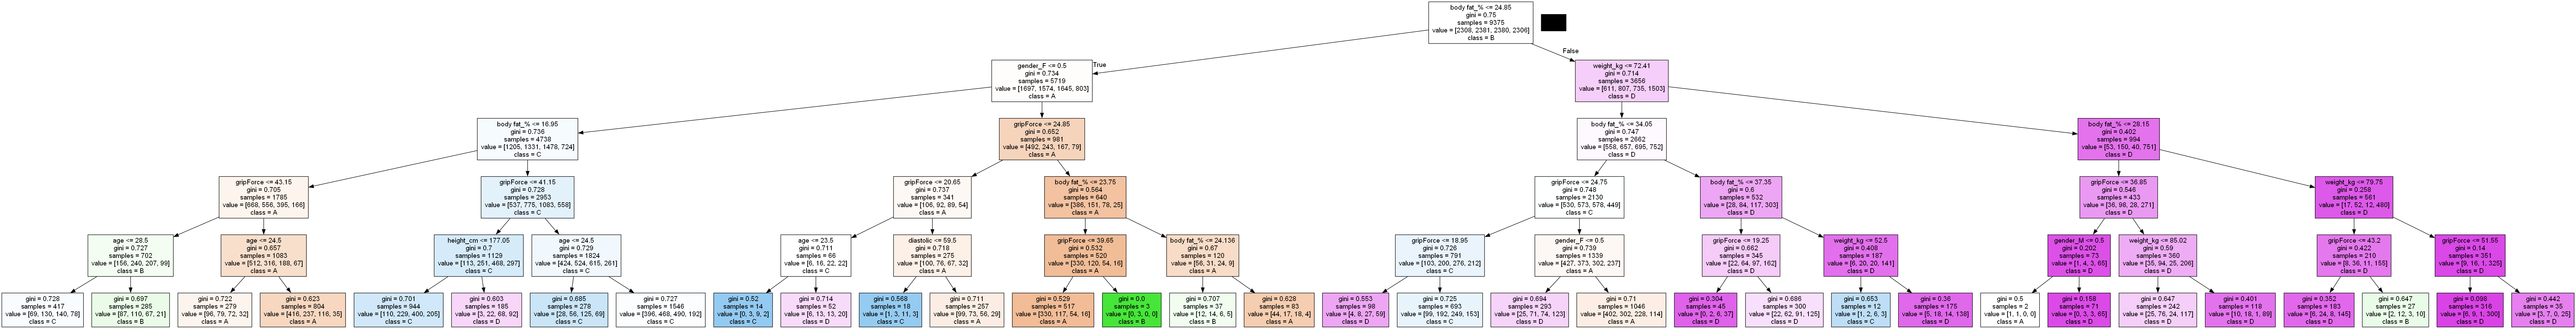

In [3]:

clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, feature_names=list(encoder.get_feature_names_out()) + numeric_columns, class_names=["A", "B", "C", "D"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Vytvoř matici záměn pro rozhodovací strom. Kolik jedinců s nejvyšší fyzickou výkonností (tj. ze skupiny A) bylo klasifikování správně? Kolik pak bylo zařazeno do skupin B, C a D? Uveď výsledky do komentáře v programu nebo do buňky v Jupyter notebooku.

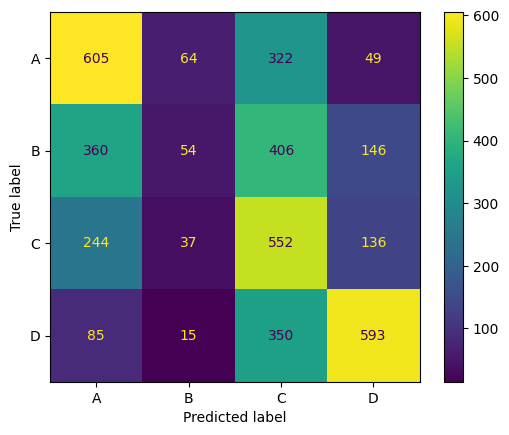

In [4]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [5]:
round(accuracy_score(y_test, y_pred), 4)

0.449

Z výše uvedené matice záměn vyplývá, že model správně zařadil 605 osob do nejvyšší výkonnostní kategorie A, 54 osob správně zařadil do skupiny B, 552 osob do skupiny C a 593 osob do skupiny D.

Hodnota metriky accuracy je cca 44,90 %.

Rozřazení pomocí algoritmu K nearest neighbours:

In [6]:
clf_K = KNeighborsClassifier()
clf_K.fit(X_train, y_train)
y_pred = clf_K.predict(X_test)


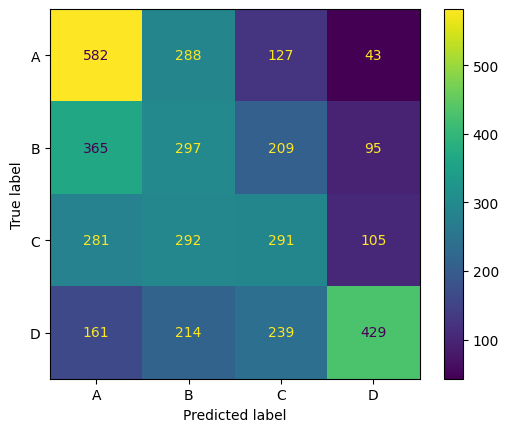

In [7]:
ConfusionMatrixDisplay.from_estimator(clf_K, X_test, y_test)

In [8]:
round(accuracy_score(y_test, y_pred), 4)

0.398

Hodnota metriky accuracy je v případě použití algoritmu K nearest neighbours cca 39,80 %. Vidíme také, že tento algoritmus dává o něco vyváženější výsledky při rozřazování osob do skupin (A - 582, B - 297, C - 291, D - 429).

Urči metriku accuracy pro rozhodovací strom a pro jeden ze dvou vybraných algoritmů. Který algoritmus si vedl lépe? Odpověď napiš do komentáře.

Na základě srovnání výsledných hodnot metrik u použitých algoritmů si o něco lépe vedl rozhodovací strom, kde accuracy dosáhla hodnoty přibližně 44,90 %.

Nyní uvažuj, že se rozhodneš testovat jedince pomocí jednoho ze cviků. Vyber cvik, který dle tebe nejvíce vypovídá o fyzické výkonnosti jedince. Porovnej, o kolik se zvýšila hodnota metriky accuracy pro oba algoritmy.

Testování bude nyní provedeno na základě skoku do dálky v cm:

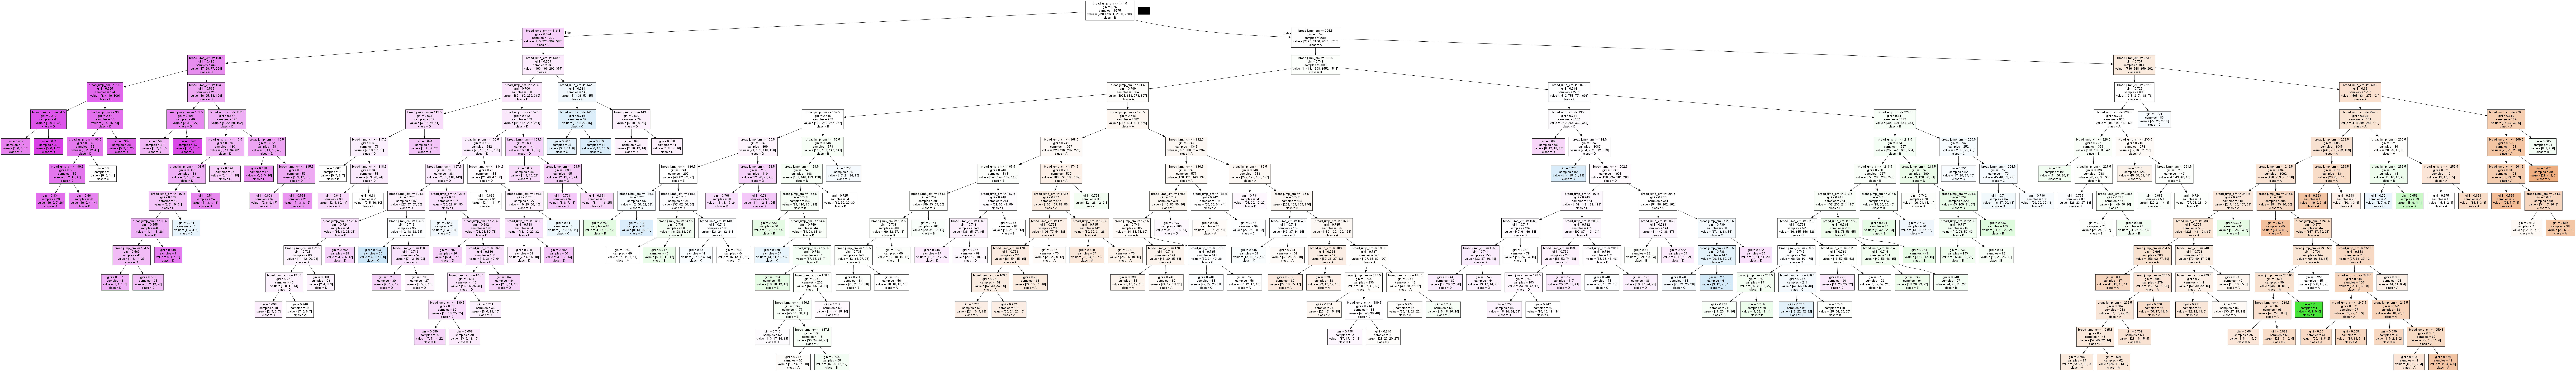

In [9]:
feature_column = ["broad jump_cm"]
X = data[feature_column]
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=feature_column, class_names=["A", "B", "C", "D"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

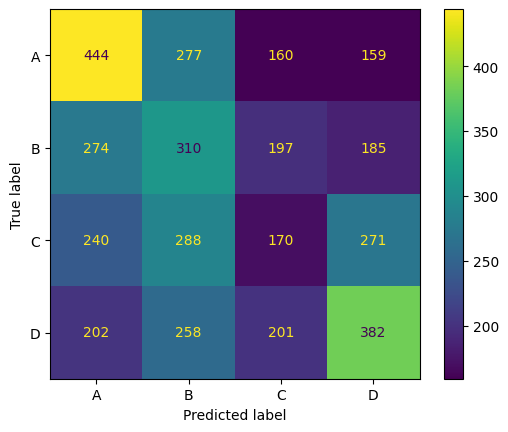

In [10]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [11]:
round(accuracy_score(y_test, y_pred), 4)

0.325

Z výše uvedené matice záměn v porovnání s první maticí záměn pro rozhodovací strom vyplývá, že úspěšnost správného rozřazení do výkonnostních skupin je menší, o čemž svědčí i nižší hodnota metriky accuracy - cca 32,5 %.

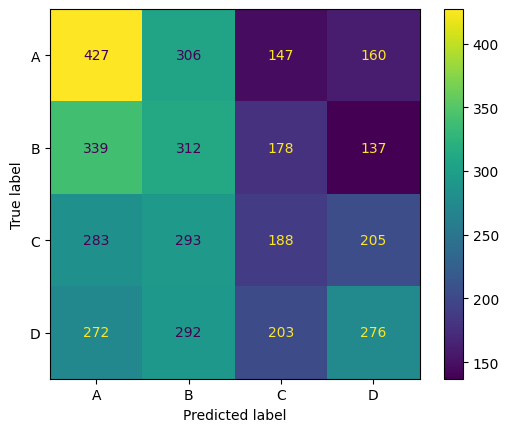

In [12]:
clf_K2 = KNeighborsClassifier()
clf_K2.fit(X_train, y_train)
y_pred = clf_K2.predict(X_test)

ConfusionMatrixDisplay.from_estimator(clf_K2, X_test, y_test)

In [13]:
round(accuracy_score(y_test, y_pred), 4)

0.2994

Při použití algoritmu K nearest neighbours vychází hodnota accuracy ještě nižší, přibližně 29,94 %.

Nižší přesnost modelu při použití pouze jednoho cvku pro rozřazení do skupin je logické, protože rozhodování se provádí pouze na základě jediného parametru.